In [1]:
import tensorflow as tf

# WITH DROPOUT

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(320,240,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
])

In [3]:
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 238, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 119, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 58, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 78, 58, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 289536)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'C:\DSet\Train',  # This is the source directory for training images
        target_size=(320,240),  # All images will be resized to 320*240
        batch_size=64,
        class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
        'C:\DSet\Validation',  
        target_size=(320,240), 
        batch_size=32,
        class_mode='sparse')

Found 2716 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [5]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/5
8/8 [==============================] - 32s 4s/step - loss: 6.6257 - accuracy: 0.5137 - val_loss: 0.7084 - val_accuracy: 0.7656
Epoch 2/5
8/8 [==============================] - 34s 4s/step - loss: 0.4611 - accuracy: 0.8516 - val_loss: 0.1074 - val_accuracy: 0.9648
Epoch 3/5
8/8 [==============================] - 31s 4s/step - loss: 0.0978 - accuracy: 0.9590 - val_loss: 0.1318 - val_accuracy: 0.9844
Epoch 4/5
8/8 [==============================] - 36s 4s/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.3073 - val_accuracy: 0.9805
Epoch 5/5
8/8 [==============================] - 33s 4s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2638 - val_accuracy: 0.9844


Text(0.5, 1.0, 'Training and validation loss')

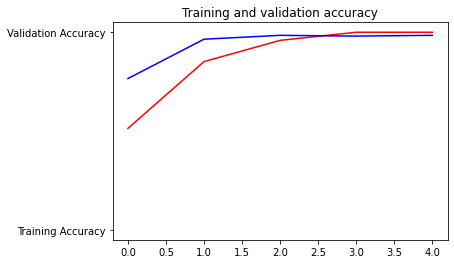

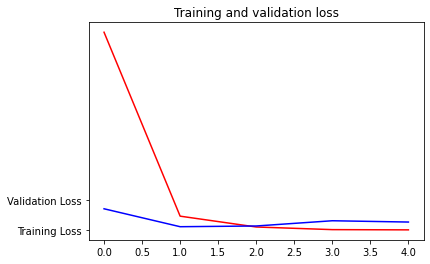

In [6]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# With Batch Normalization

In [32]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(320,240,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
])

model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 318, 238, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 159, 119, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 157, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 78, 58, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 78, 58, 64)        256       
_________________________________________________________________
flatten_8 (Flatten)          (None, 289536)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)              

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'C:\DSet\Train',  # This is the source directory for training images
        target_size=(320,240),  # All images will be resized to 320*240
        batch_size=64,
        class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
        'C:\DSet\Validation',  
        target_size=(320,240), 
        batch_size=32,
        class_mode='sparse')

Found 2716 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [34]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/5
8/8 [==============================] - 35s 4s/step - loss: 16.7114 - accuracy: 0.6836 - val_loss: 1.6486 - val_accuracy: 0.8164
Epoch 2/5
8/8 [==============================] - 35s 4s/step - loss: 0.3141 - accuracy: 0.9648 - val_loss: 1.0308 - val_accuracy: 0.6250
Epoch 3/5
8/8 [==============================] - 33s 4s/step - loss: 0.0388 - accuracy: 0.9863 - val_loss: 0.2959 - val_accuracy: 0.8164
Epoch 4/5
8/8 [==============================] - 34s 4s/step - loss: 0.0166 - accuracy: 0.9980 - val_loss: 0.1075 - val_accuracy: 0.9688
Epoch 5/5
8/8 [==============================] - 33s 4s/step - loss: 5.4290e-07 - accuracy: 1.0000 - val_loss: 0.7588 - val_accuracy: 0.9062


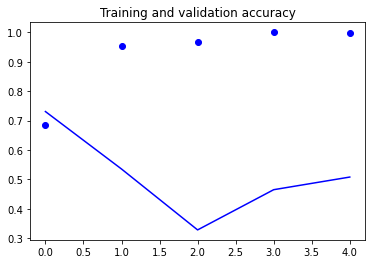

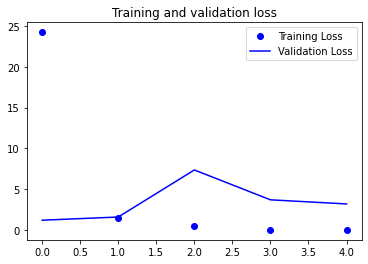

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Augmentation

In [14]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(320,240,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
])

model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 318, 238, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 159, 119, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 157, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 78, 58, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 289536)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               148242944 
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ADDED AUGMENTATION. ROTATION AND OTHER FUNCTIONS ARE DONE
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'C:\DSet\Train',  # This is the source directory for training images
        target_size=(320,240),  # All images will be resized to 320*240
        batch_size=64,
        class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
        'C:\DSet\Validation',  
        target_size=(320,240), 
        batch_size=32,
        class_mode='sparse')

Found 2716 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/5
8/8 [==============================] - 31s 4s/step - loss: 6.6361 - accuracy: 0.4570 - val_loss: 0.6640 - val_accuracy: 0.8008
Epoch 2/5
8/8 [==============================] - 29s 4s/step - loss: 0.8046 - accuracy: 0.5938 - val_loss: 0.4601 - val_accuracy: 0.8555
Epoch 3/5
8/8 [==============================] - 29s 4s/step - loss: 0.4187 - accuracy: 0.8848 - val_loss: 0.1403 - val_accuracy: 0.9492
Epoch 4/5
8/8 [==============================] - 30s 4s/step - loss: 0.3121 - accuracy: 0.8824 - val_loss: 0.1638 - val_accuracy: 0.9297
Epoch 5/5
8/8 [==============================] - 37s 5s/step - loss: 0.1684 - accuracy: 0.9336 - val_loss: 0.0698 - val_accuracy: 0.9844


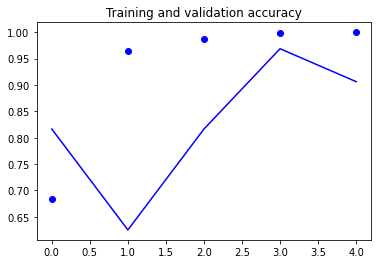

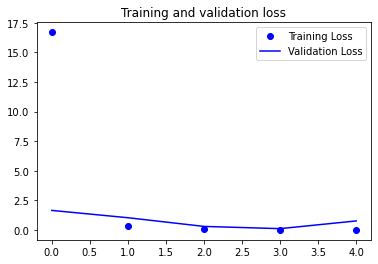

In [36]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# With all 3

In [50]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(320,240,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
])

model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 318, 238, 32)      896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 159, 119, 32)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 159, 119, 32)      128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 157, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 78, 58, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 78, 58, 64)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 289536)          

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ADDED AUGMENTATION. ROTATION AND OTHER FUNCTIONS ARE DONE
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'C:\DSet\Train',  # This is the source directory for training images
        target_size=(320,240),  # All images will be resized to 320*240
        batch_size=64,
        class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
        'C:\DSet\Validation',  
        target_size=(320,240), 
        batch_size=32,
        class_mode='sparse')

Found 2716 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [52]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/10
8/8 [==============================] - 34s 4s/step - loss: 19.7350 - accuracy: 0.4980 - val_loss: 1.2830 - val_accuracy: 0.5430
Epoch 2/10
8/8 [==============================] - 34s 4s/step - loss: 3.6426 - accuracy: 0.5566 - val_loss: 3.2240 - val_accuracy: 0.3164
Epoch 3/10
8/8 [==============================] - 34s 4s/step - loss: 1.2156 - accuracy: 0.7695 - val_loss: 2.2236 - val_accuracy: 0.3164
Epoch 4/10
8/8 [==============================] - 35s 4s/step - loss: 0.4314 - accuracy: 0.8848 - val_loss: 1.1691 - val_accuracy: 0.3789
Epoch 5/10
8/8 [==============================] - 34s 4s/step - loss: 0.2259 - accuracy: 0.9219 - val_loss: 0.9086 - val_accuracy: 0.5352
Epoch 6/10
8/8 [==============================] - 34s 4s/step - loss: 0.0461 - accuracy: 0.9844 - val_loss: 0.8621 - val_accuracy: 0.5234
Epoch 7/10
8/8 [==============================] - 33s 4s/step - loss: 0.0580 - ac

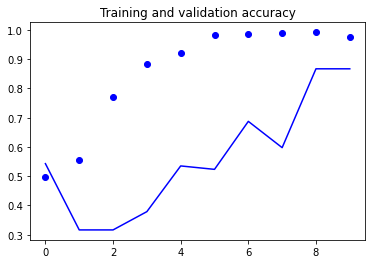

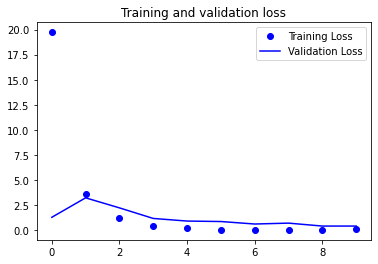

In [53]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()